In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize=(10, 6))

In [52]:
df = pd.read_csv('horse.csv')
df.surgery = df.surgery.map({'no': False, 'yes': True})
df.surgical_lesion = df.surgical_lesion.map({'no': False, 'yes': True})
df.cp_data = df.cp_data.map({'no': False, 'yes': True})

df['outcome'].replace('euthanized', 'died', inplace=True)
df['capillary_refill_time'].replace('3', 'more_3_sec', inplace=True)
df

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,False,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,False,11300,0,0,False
1,True,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,died,False,2208,0,0,False
2,False,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,False,0,0,0,True
3,True,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,True,2208,0,0,True
4,False,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,False,4300,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,True,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,...,55.0,65.0,NaN,NaN,died,False,3205,0,0,False
295,False,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,...,44.0,NaN,serosanguious,3.3,died,True,2208,0,0,True
296,True,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,...,60.0,6.8,NaN,NaN,died,True,3205,0,0,False
297,True,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,...,50.0,6.0,serosanguious,3.4,lived,True,2208,0,0,True


# Opis zbioru danych


Wstępna analiza

In [53]:
df.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [58]:
# show outcome of horses with two surgeries
twice = df.hospital_number.value_counts()
twice = twice[twice == 2]
df_twice = df[df['hospital_number'].isin(twice.index)]
df_twice = df_twice[['hospital_number', 'outcome']].sort_values(by='hospital_number')
df_twice
# Po przyjrzeniu się przypadkom koni które posiadają dwa rekordy (nie ma potrójnych)

,hospital_number,outcome
281,527544,died
110,527544,died
165,527916,lived
159,527916,lived
178,528151,died
204,528151,died
234,528469,died
73,528469,died
94,528729,lived
233,528729,lived


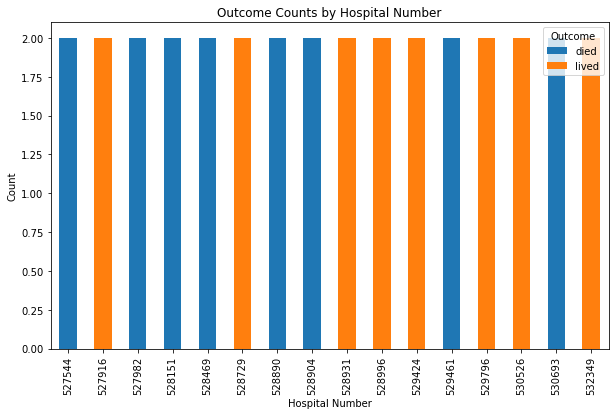

In [69]:
df_twice['hospital_number'] = df_twice['hospital_number'].replace(5279822, 527982)

# Count the occurrences of each outcome for each hospital number
counts = df_twice.groupby(['hospital_number', 'outcome']).size().unstack(fill_value=0)

# Plot the bar chart
counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Hospital Number')
plt.ylabel('Count')
plt.title('Outcome Counts by Hospital Number')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many hospital numbers
plt.legend(title='Outcome')
plt.show()

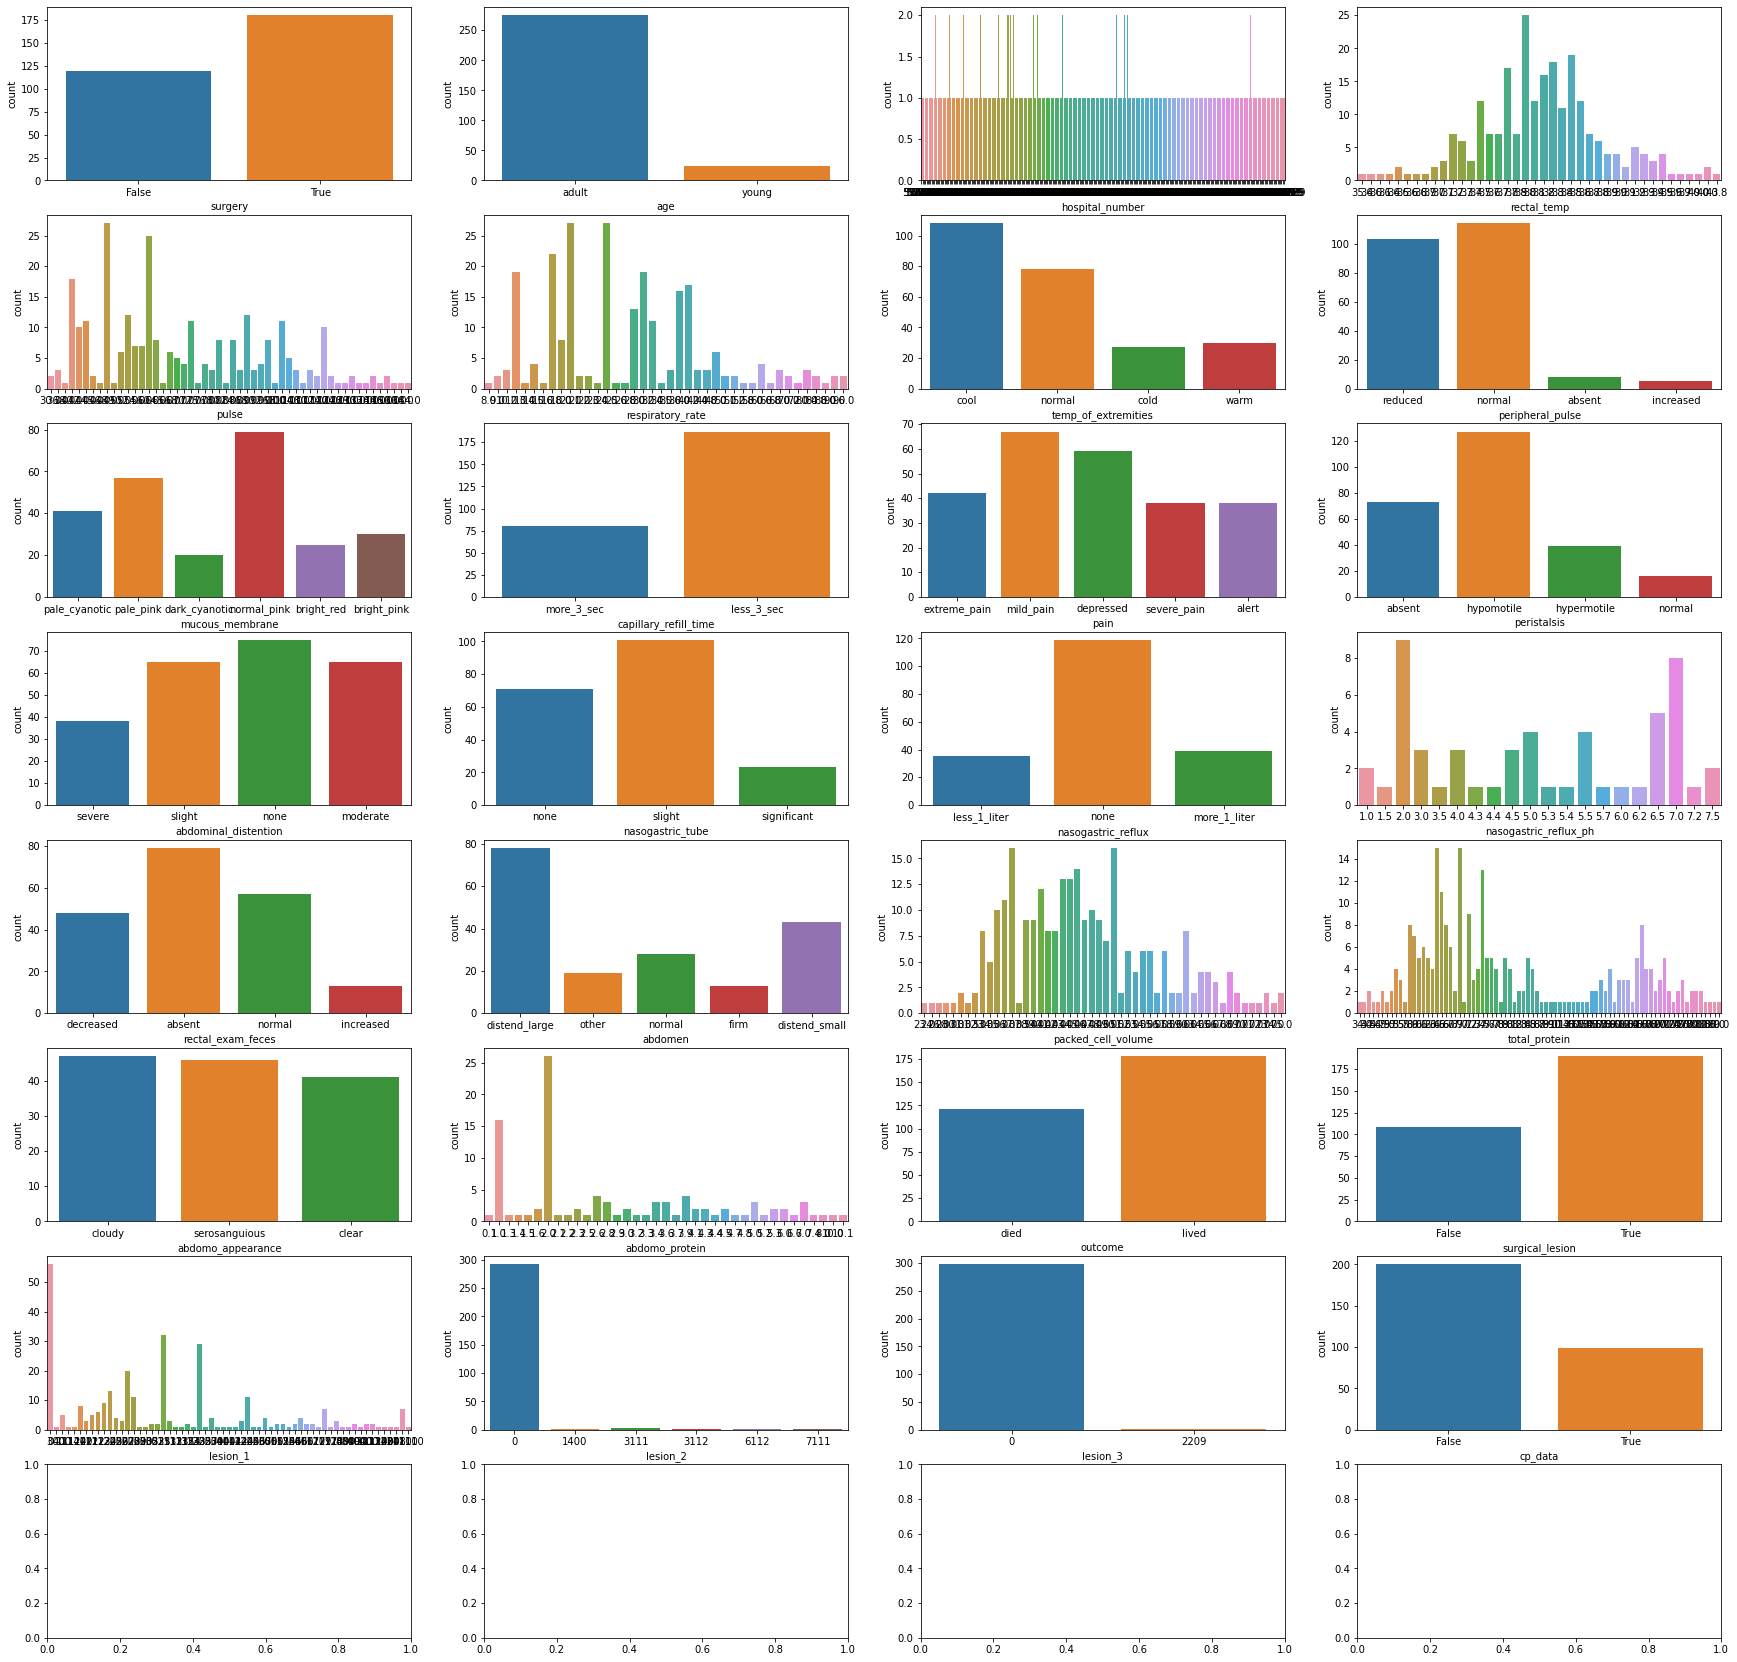

In [56]:
# total_count = len(df)
# categorical = df.drop(columns=['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']).columns
# table, index = [], []
# for column in categorical:
#     for value in df[column].unique():
#         n = np.sum(df[column] == value)
#         table += [{'count': n, 'frequency %': np.round(n/total_count*100, 2)}]
#         index += [(column, value)]
# pd.DataFrame(table, index=pd.MultiIndex.from_tuples(index))

fig, axs = plt.subplots(ncols=4, nrows=8, figsize=(30, 30))
axs = axs.reshape(-1)
i = 0
for name in df.columns:
    sns.countplot(x=name, ax=axs[i], data=df)
    i += 1

In [57]:
# TODO capillary_refill_time 3 into 3_or_more

# C5.0 (Quinlan 1993; Kuhn and Johnson 2013)
# Naive Bayes
# XGBoost